# DATA ANALYSIS AND PREPROCESSING

## Import Libraries

In [51]:
# Import necessary libraries
# Suppress warnings and set up matplotlib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend for matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance


import plotly.express as px
import os
import datetime

## Load Primitive Data

In [52]:
# Load India Air Quality dataset
india_data = pd.read_csv("Primitive Data/air-quality-India.csv")

italy_data = pd.read_csv("Primitive Data/air-quality-Italy.csv", delimiter=';', encoding='ascii')


## DATASET 1: India Air Quality dataset

This dataset contains 29,531 air quality measurements from 26 Indian cities between 2015-2020, tracking 14 pollutants along with AQI scores and categories:
- **City**: Geographic identifier for 26 major Indian cities including Delhi, Mumbai, Bengaluru, Chennai, Kolkata, Hyderabad, Pune, Ahmedabad, and others  
- **Date**: Timestamp indicating when measurements were recorded, spanning 2015-2020 with hourly/daily frequency  
- **PM2.5**: Ultra-fine particles ≤2.5 micrometers; penetrate deep into lungs/bloodstream causing cardiovascular disease, stroke, lung cancer (μg/m³)  
- **PM10**: Inhalable particles ≤10 micrometers including dust, pollen, mold; cause throat irritation, coughing, reduced lung function (μg/m³)  
- **NO**: Nitric oxide; primary pollutant from vehicle exhausts and high-temperature combustion processes (μg/m³)  
- **NO2**: Nitrogen dioxide; secondary pollutant formed when NO reacts with oxygen; causes respiratory inflammation, reduced immunity (μg/m³)  
- **NOx**: Combined nitrogen oxides (NO + NO2); indicator of traffic density and combustion sources (μg/m³)  
- **NH3**: Ammonia from agricultural fertilizers, livestock waste, vehicle catalytic converters; contributes to secondary PM2.5 formation (μg/m³)  
- **CO**: Carbon monoxide; colorless, odorless gas from incomplete fuel combustion; reduces oxygen delivery in blood, causes headaches, dizziness (mg/m³)  
- **SO2**: Sulfur dioxide from coal burning, oil refining, metal smelting; causes respiratory problems, acid rain formation (μg/m³)  
- **O3**: Ground-level ozone; not directly emitted but formed when NOx and VOCs react in sunlight; causes chest pain, coughing, asthma attacks (μg/m³)  
- **Benzene**: Known human carcinogen from gasoline, industrial solvents, cigarette smoke; causes leukemia, bone marrow damage (μg/m³)  
- **Toluene**: From paint thinners, nail polish, gasoline; affects central nervous system, causes fatigue, confusion (μg/m³)  
- **Xylene**: Industrial solvent in paints, rubber, leather; affects nervous system, liver, kidneys with prolonged exposure (μg/m³)  
- **AQI**: Air Quality Index; standardized 0-500+ scale combining multiple pollutants into single health-based number using worst pollutant (dimensionless)  
- **AQI_Bucket**: Categorical classification: Good (0-50), Satisfactory (51-100), Moderate (101-200), Poor (201-300), Very Poor (301-400), Severe (401-500+)  
- **CO2**: Carbon dioxide is not directly measured in this dataset, but is a major greenhouse gas from fossil fuel combustion, contributing to climate change and urban heat island effects (ppm)

In [53]:
india_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [54]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [55]:
india_data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [56]:
india_data.dropna(axis=0, inplace=True)

In [57]:
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 2123 to 29529
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6236 non-null   object 
 1   Date        6236 non-null   object 
 2   PM2.5       6236 non-null   float64
 3   PM10        6236 non-null   float64
 4   NO          6236 non-null   float64
 5   NO2         6236 non-null   float64
 6   NOx         6236 non-null   float64
 7   NH3         6236 non-null   float64
 8   CO          6236 non-null   float64
 9   SO2         6236 non-null   float64
 10  O3          6236 non-null   float64
 11  Benzene     6236 non-null   float64
 12  Toluene     6236 non-null   float64
 13  Xylene      6236 non-null   float64
 14  AQI         6236 non-null   float64
 15  AQI_Bucket  6236 non-null   object 
dtypes: float64(13), object(3)
memory usage: 828.2+ KB


In [58]:
# Show head of the cleaned dataset
india_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
2123,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2124,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2125,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2126,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
2127,Amaravati,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [59]:
# Save the preprocessed India dataset

# Save the cleaned India dataset
india_data.to_csv("Preprocessed Data/preprocessed_india_air_quality.csv", index=False)
print(f"Final dataset shape: {india_data.shape}")

Final dataset shape: (6236, 16)


In [60]:

india_data['Date'] = pd.to_datetime(india_data['Date'])

fig1 = px.line(india_data, x='Date', y='AQI', color='City', title='AQI Trend Over Time')
fig1.show()

# Box plot for AQI distribution by City
fig2 = px.box(india_data, x='City', y='AQI', title='AQI Distribution by City')
fig2.update_layout(xaxis={'categoryorder':'total descending'})
fig2.show()

# Scatter plot matrix for selected features
selected_features = ['PM2.5', 'NO2', 'CO', 'O3', 'AQI']
fig3 = px.scatter_matrix(india_data[selected_features], title='Scatter Plot Matrix')
fig3.show()

## DATASET 2: Italy Air Quality dataset

This dataset contains 9,471 hourly measurements from March 2004-February 2005 comparing 5 metal oxide chemical sensor responses for CO, NMHC, benzene, NOx, and NO2 at a roadside location in a polluted Italian city.
- **Date**: Measurement date in DD/MM/YYYY format, spanning March 2004 to February 2005  
- **Time**: Hourly timestamp in HH.MM.SS format for precise temporal tracking  
- **CO(GT)**: True carbon monoxide concentration from certified reference analyzer; toxic gas from incomplete combustion (mg/m³)  
- **NMHC(GT)**: True non-methanic hydrocarbons concentration; volatile organic compounds excluding methane (μg/m³)  
- **C6H6(GT)**: True benzene concentration; known carcinogen from gasoline and industrial processes (μg/m³)  
- **NOx(GT)**: True nitrogen oxides concentration; traffic pollution indicator (ppb - parts per billion)  
- **NO2(GT)**: True nitrogen dioxide concentration; respiratory irritant from combustion (μg/m³)  
- **PT08.S1(CO)**: Tin oxide sensor response targeting CO detection; provides real-time CO monitoring capability (sensor units)  
- **PT08.S2(NMHC)**: Titania sensor response targeting non-methanic hydrocarbons detection (sensor units)  
- **PT08.S3(NOx)**: Tungsten oxide sensor response targeting nitrogen oxides detection (sensor units)  
- **PT08.S4(NO2)**: Tungsten oxide sensor response targeting nitrogen dioxide detection (sensor units)  
- **PT08.S5(O3)**: Indium oxide sensor response targeting ozone detection; monitors photochemical pollution (sensor units)  
- **T**: Ambient temperature affecting sensor performance and pollutant behavior (°C)  
- **RH**: Relative humidity impacting sensor sensitivity and atmospheric chemistry (%)  
- **AH**: Absolute humidity providing complete moisture content measurement (g/m³)  


In [61]:
# Display basic information about Italy dataset
print("Italy Air Quality Dataset - Basic Information:")
print(f"Shape: {italy_data.shape}")


Italy Air Quality Dataset - Basic Information:
Shape: (9471, 17)


In [62]:
# Convert the 'Date' column to datetime, infer date format
try:
    italy_data['Date'] = pd.to_datetime(italy_data['Date'], infer_datetime_format=True, errors='coerce')
    print("'Date' column converted to datetime.")
    print(f"Date column info after conversion:")
    print(italy_data['Date'].dtype)
except Exception as e:
    print('Error converting Date column:', e)

'Date' column converted to datetime.
Date column info after conversion:
datetime64[ns]


In [63]:
# Combine date and time into a single datetime column if needed
try:
    italy_data['DateTime'] = pd.to_datetime(italy_data['Date'].dt.strftime('%Y-%m-%d') + ' ' + italy_data['Time'], 
                                    format='%Y-%m-%d %H.%M.%S',
                                    errors='coerce')
    print("Combined Date and Time into DateTime.")
except Exception as e:
    print('Error combining Date and Time:', e)


Combined Date and Time into DateTime.


In [64]:
# Some columns which are meant to be numeric are stored as strings. Let's attempt conversion.
numeric_cols = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
for col in numeric_cols:
    italy_data[col] = pd.to_numeric(italy_data[col], errors='coerce')

In [65]:
# Report missing values in the dataset
missing_summary = italy_data.isnull().sum()
print('Missing values per column:')
print(missing_summary[missing_summary > 0])

Missing values per column:
Date             5874
Time              114
CO(GT)           7334
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)         9471
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                9105
RH               9105
AH               9105
Unnamed: 15      9471
Unnamed: 16      9471
DateTime         5874
dtype: int64


In [66]:
# Drop unnecessary unnamed columns if they are not useful
italy_data = italy_data.loc[:, ~italy_data.columns.str.contains('^Unnamed')]
print('Final shape after cleaning unnamed columns:', italy_data.shape)

Final shape after cleaning unnamed columns: (9471, 16)


In [67]:
italy_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2004-10-03,18.00.00,NaN,1360.0,150.0,NaN,1046.0,166.0,1056.0,113.0,1692.0,1268.0,NaN,NaN,NaN,2004-10-03 18:00:00
1,2004-10-03,19.00.00,2.0,1292.0,112.0,NaN,955.0,103.0,1174.0,92.0,1559.0,972.0,NaN,NaN,NaN,2004-10-03 19:00:00
2,2004-10-03,20.00.00,NaN,1402.0,88.0,NaN,939.0,131.0,1140.0,114.0,1555.0,1074.0,NaN,NaN,NaN,2004-10-03 20:00:00
3,2004-10-03,21.00.00,NaN,1376.0,80.0,NaN,948.0,172.0,1092.0,122.0,1584.0,1203.0,NaN,NaN,NaN,2004-10-03 21:00:00
4,2004-10-03,22.00.00,NaN,1272.0,51.0,NaN,836.0,131.0,1205.0,116.0,1490.0,1110.0,NaN,NaN,NaN,2004-10-03 22:00:00


In [68]:
# Save the preprocessed Italy dataset
italy_data.to_csv("Preprocessed Data/preprocessed_italy_air_quality.csv", index=False)

print(f"Preprocessed Italy dataset saved to: Preprocessed Data/preprocessed_italy_air_quality.csv")


Preprocessed Italy dataset saved to: Preprocessed Data/preprocessed_italy_air_quality.csv


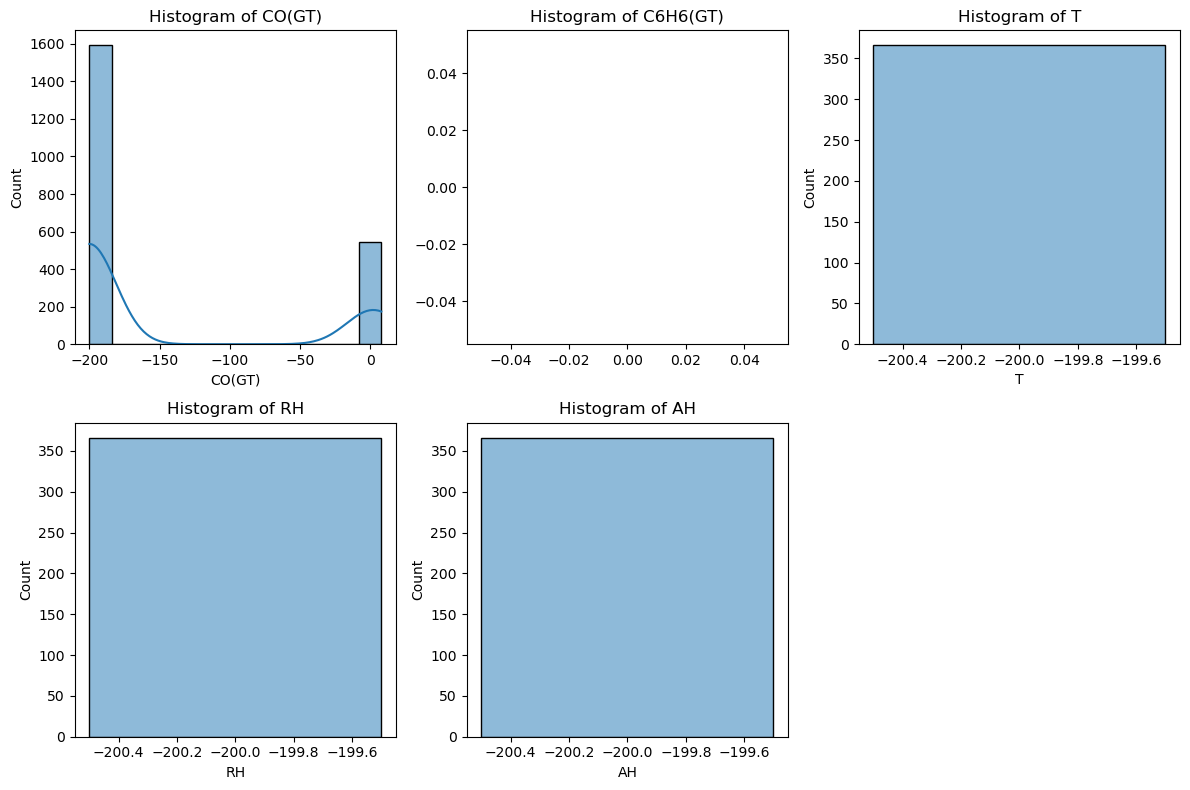

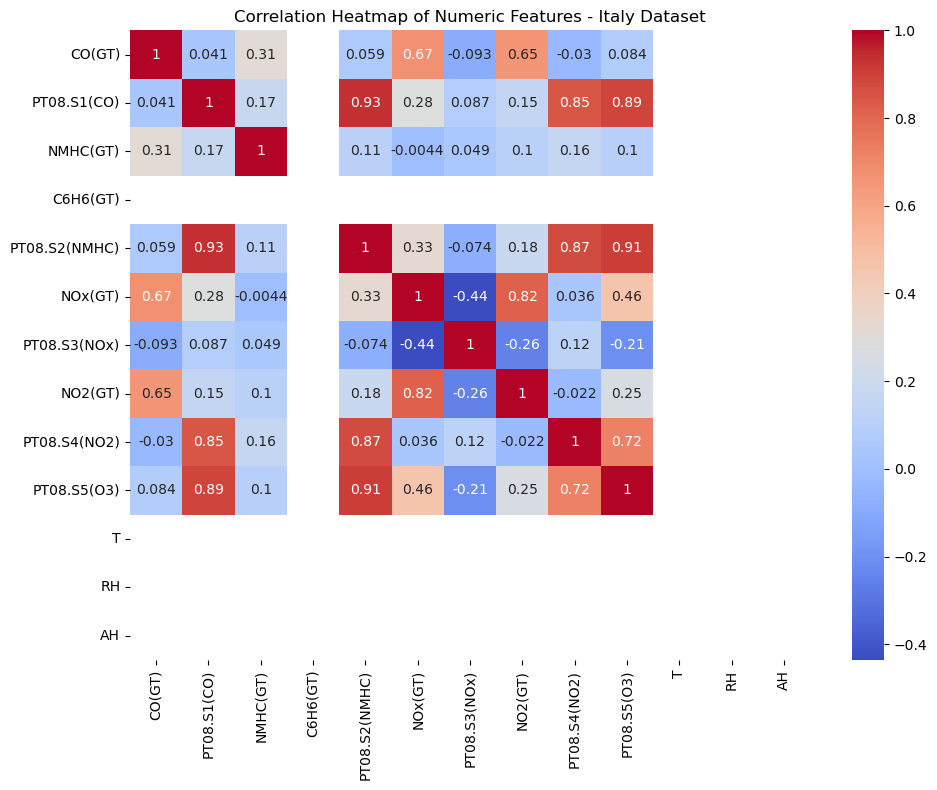

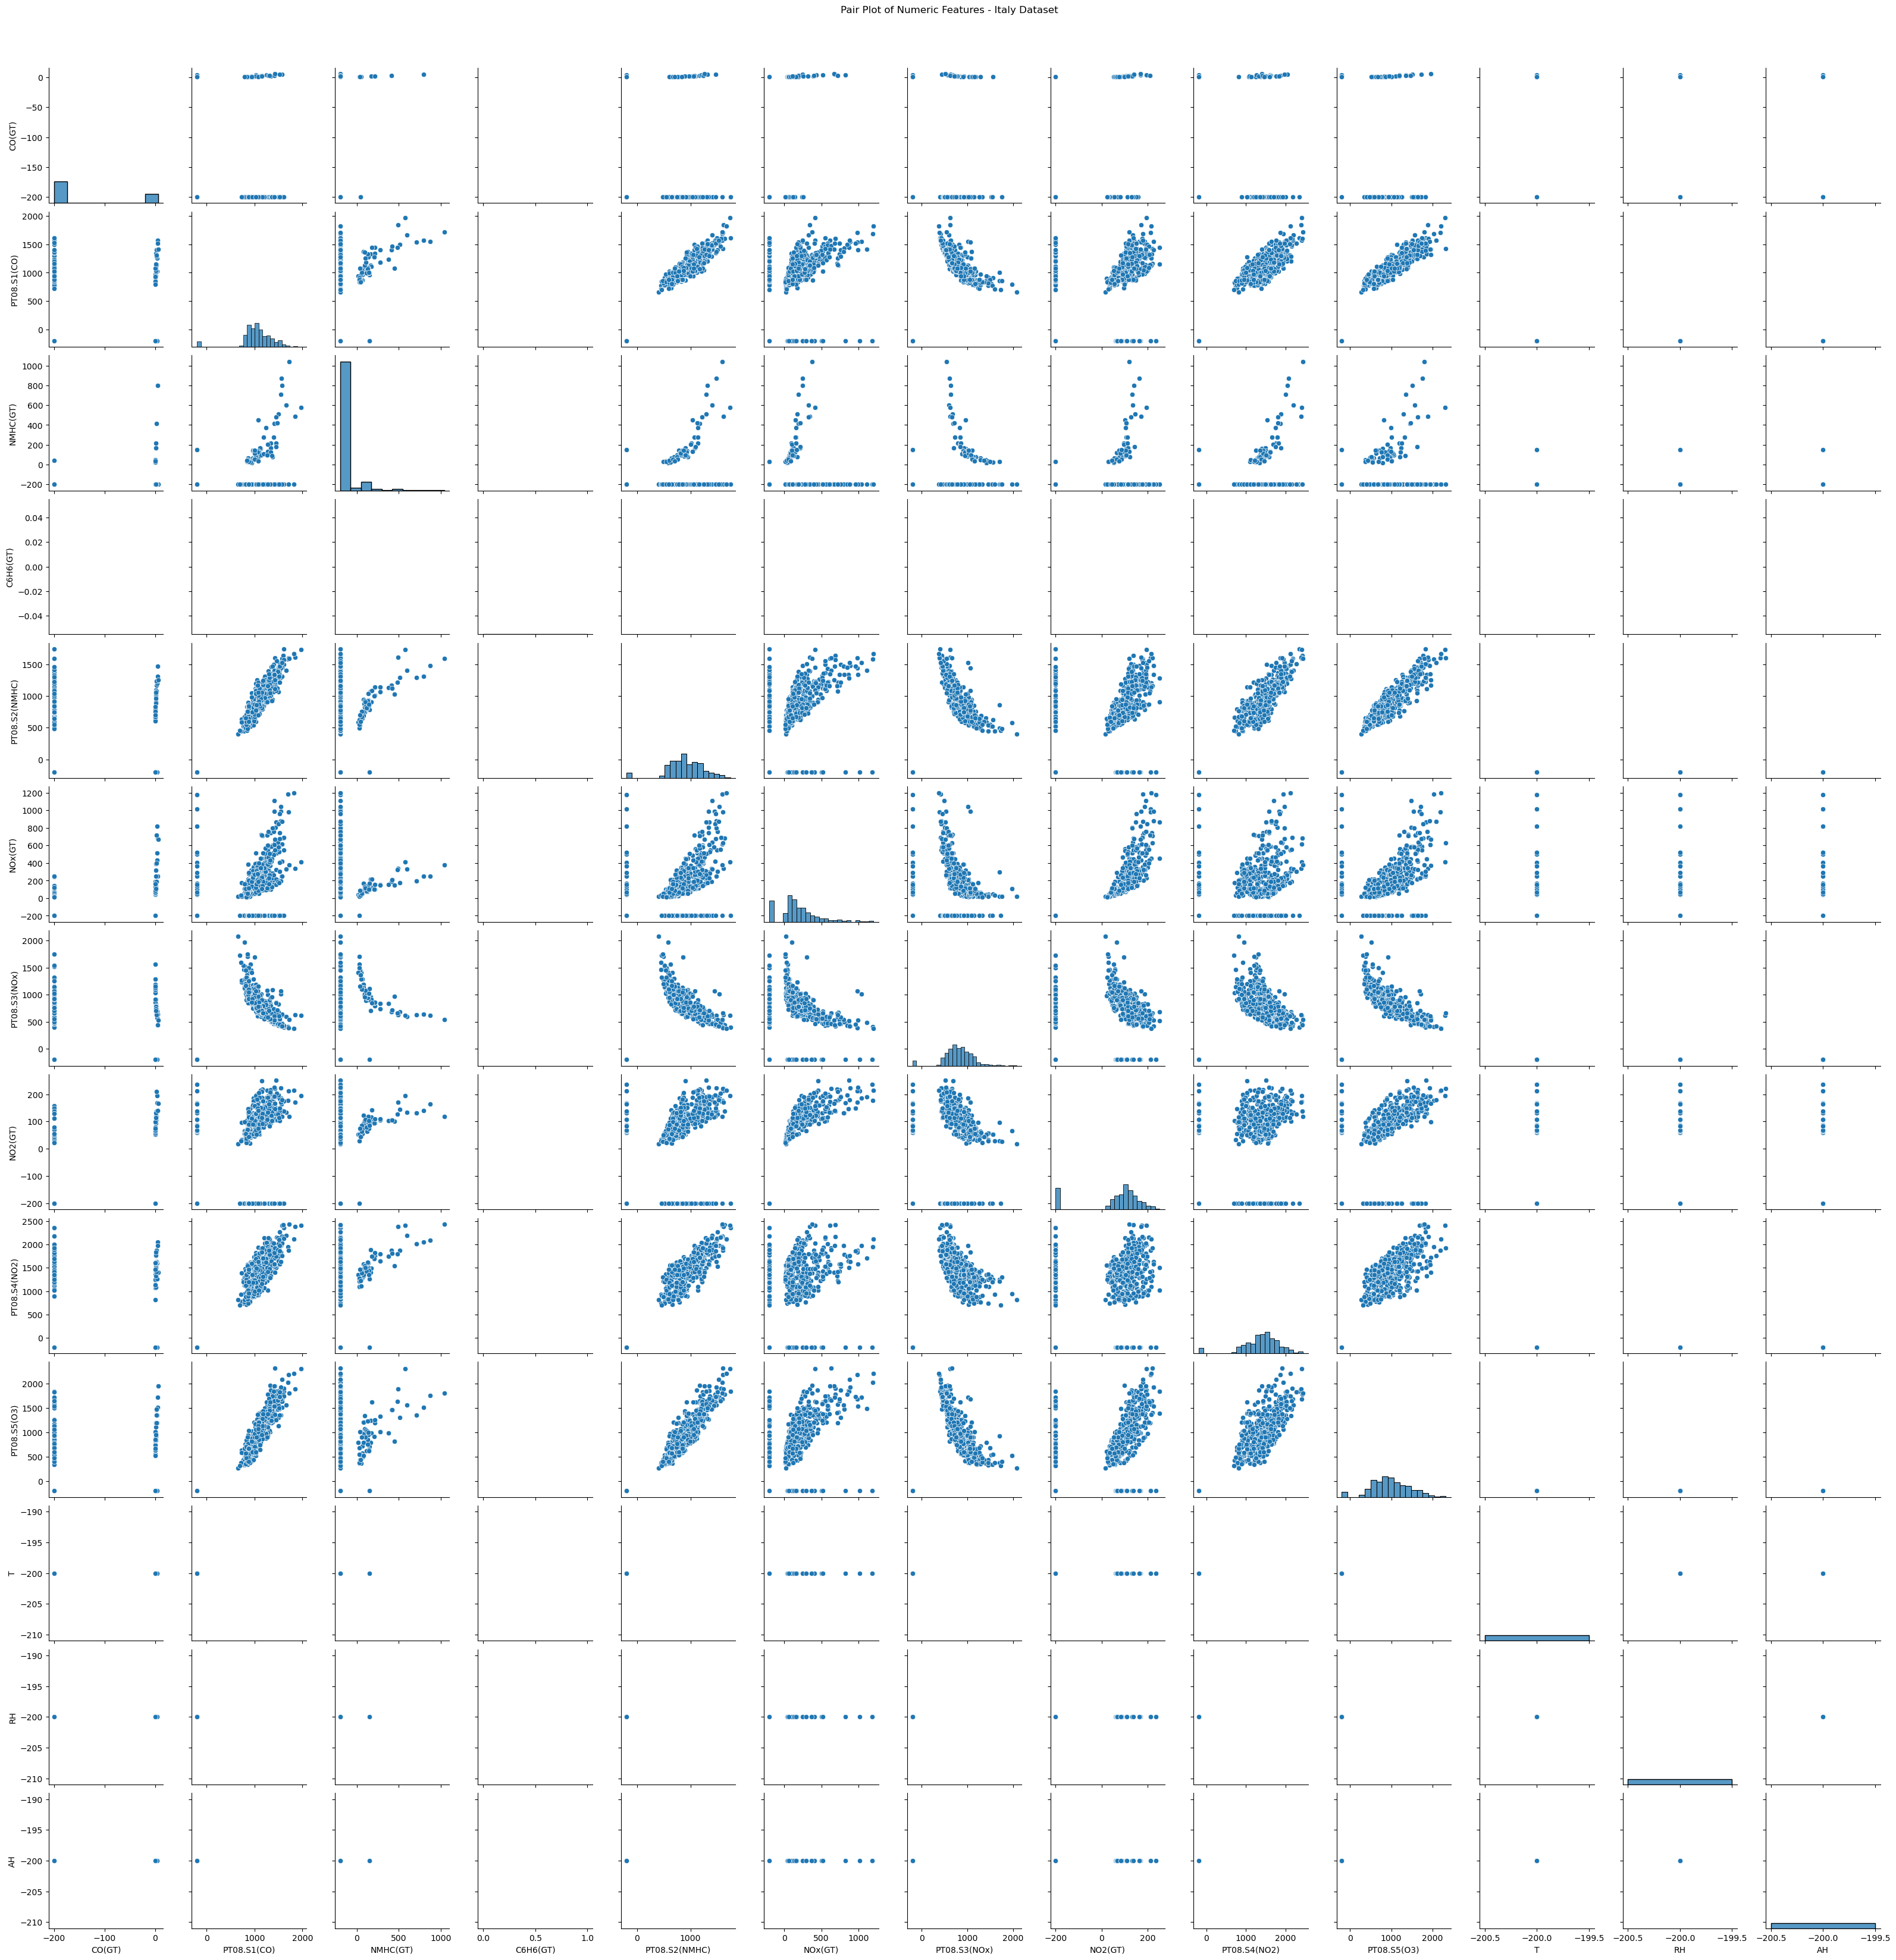

In [69]:
# Exploratory Data Analysis (EDA) for Italy Dataset

# Let's plot a histogram for a few of the numerical columns to check distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']):
    plt.subplot(2, 3, i+1)
    sns.histplot(italy_data[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Plot a correlation heatmap if we have at least four numeric columns
numeric_italy = italy_data.select_dtypes(include=[np.number])
if numeric_italy.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_italy.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features - Italy Dataset')
    plt.tight_layout()
    plt.show()

# Pair Plot of selected numeric features (if not too many observations are present)
sampled_italy = numeric_italy.sample(n=min(500, len(numeric_italy)), random_state=42)  # limit sample size
sns.pairplot(sampled_italy)
plt.suptitle('Pair Plot of Numeric Features - Italy Dataset', y=1.02)
plt.show()